# Particle Swarm Optimization

É um algoritmo baseado em heurística que busca uma solução ótima em um espaaço de solução de uma função objetivo. Geralmente, utilizado para encontrar pontos de máximos/mínimos de funções não lineares.

A otimização é baseada na troca de informação entre partículas dentro do espaço de solução da modelagem, as partículas se integarem entre-se alterando a velocidade de posição em que cada uma terá a cada iteração no algoritmo. Os parâmetros necessários para a implementação são: tamanho da população ($K$), topologia ($global$ ou $local$) e equacionamento.

A topologia escolhida afeta o comportamento das partículas em geral. A $global$ possibilita que todas as partículas compartilhem informações, a $local$ possibilita apenas que as vizinhas tenham acesso as informações da posição e ponto de melhor posição ($\rho_{best}$).

O equacionamento do algortimo se baseia na busca do ponto ótimo (mínimo ou máximo), o algoritmo atualiza a velocidade ($v_k$) e a posição ($x_k$) de cada partícula. Sejam $K$ partículas, temos que $v_k$ e $x_k$ são atualizados da seguinte forma:


   \begin{equation*}
        \begin{split}
            v_{k+1} = wv_k + c_1r_1(\rho_{best_k} - x_k) + c_2r_2(g_{best} - x_k)\\
            x_{k+1} = x_k + v_k
        \end{split}
    \end{equation*}
    
onde $w$ é o coeficiente de inércia, $g_{best}$ é a melhor posição entre todas as partículas. $c_1$/$c_2$ são as constantes de aceleração e $r_1$/$r_2$ são v.a aleatórias distribuídas uniformemente entre 0 e 1.

O coeficiende de inércia $w$ determina o quanto a partícula deve manter com a velocidade anterior, as constantes $c_1$ e $c_2$ controlam o peso entre refinar a busca na partícula em si ou reconhecer o resultados de outras partículas.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))

c1 = c2 = 0.1
w = 0.8

k_particles = 10

np.random.seed(100)
X = np.random.rand(2, k_particles) * 5
V = np.random.rand(2, k_particles) * 0.1

def f(x,y):
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)


Definição da *função objetivo* e de *particle_update*. 

\begin{equation} f(x,y) = (x-3.14)^2 + (y-2.72)^2 + sin(3x+1.41) + sin(4y-1.73)\end{equation}

In [10]:


def particle_update(iterations = 1):
    global V, X, rho_best, rho_best_obj, g_best, g_best_obj
    
    for i in range(0, iterations):
        r1, r2 = np.random.rand(2)
        V = w*V + c1*r1*(rho_best - X) + c2*r2*(g_best.reshape(-1,1)-X)
        X = X + V
        obj = f(X[0], X[1])
        rho_best[:, (rho_best_obj >= obj)] = X[:, (rho_best_obj >= obj)]
        rho_best_obj = np.array([rho_best_obj, obj]).min(axis = 0)
        g_best = rho_best[:, rho_best_obj.argmin()]
        g_best_obj = rho_best_obj.min()

z = f(x,y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

rho_best = X
rho_best_obj = f(X[0], X[1])
g_best = rho_best[:, rho_best_obj.argmin()]
g_best_obj = rho_best_obj.min()


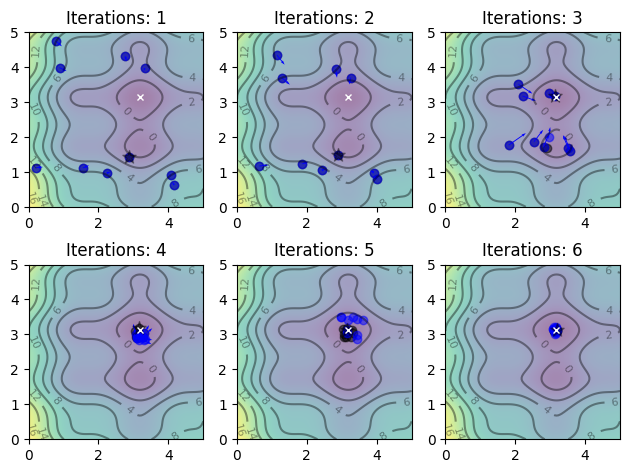

In [11]:
fig, ax = plt.subplots(2,3)

interations = 1
for i in range(0,2):
    for j in range(0,3):
        
        particle_update(interations)
        ax[i,j].set_title(f'Iterations: {interations}')
        
        fig.set_tight_layout(True)
        
        img = ax[i,j].imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
        
        ax[i,j].plot([x_min], [y_min], marker='x', markersize=5, color="white")
        contours = ax[i,j].contour(x, y, z, 10, colors='black', alpha=0.4)
        ax[i,j].clabel(contours, inline=True, fontsize=8, fmt="%.0f")
        pbest_plot = ax[i,j].scatter(rho_best[0], rho_best[1], marker='o', color='black', alpha=0.5)
        p_plot = ax[i,j].scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
        p_arrow = ax[i,j].quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
        gbest_plot = ax[i,j].scatter([g_best[0]], [g_best[1]], marker='*', s=100, color='black', alpha=0.4)
        
        ax[i,j].set_xlim([0,5])
        ax[i,j].set_ylim([0,5])
        
        interations+=1